In [147]:
import zipfile
import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import pandas as pd

print(os.listdir())

zip_path = "archive (9).zip"
extract_path = "/content/data"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Folders extracted:")
for folder in os.listdir(extract_path):
    print(folder)

animals_path = os.path.join(extract_path, "archive (7)", "animals")
print("\nAnimals folder exists:", os.path.exists(animals_path))

['.config', 'data', 'knn_tuning_results.png', 'knn_fold_accuracy.png', 'archive (9).zip', 'knn_accuracy_distribution.png', 'knn_fold_vs_average_accuracy.png', 'knn_cv_results_k1to30.csv', 'sample_data']
Folders extracted:
archive (7)

Animals folder exists: True


In [148]:

base_path = '/content/data/archive (7)/animals'
print("Checking folder structure...")
for category in os.listdir(base_path):
    print(category)


Checking folder structure...
cats
panda
dogs


In [149]:
import cv2
import numpy as np

categories = ['cats', 'dogs', 'panda']
image_size = (64, 64)
X = []  # image data
y = []  # labels

for idx, category in enumerate(categories):
    folder_path = os.path.join(base_path, category)
    files = sorted(os.listdir(folder_path))[:100]  # Take first 100 images
    for file in files:
        img_path = os.path.join(folder_path, file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, image_size)
            X.append(img.flatten())
            y.append(idx)  # Label (0 = cat, 1 = dog, 2 = panda)

X = np.array(X)
y = np.array(y)

print("Total images loaded:", len(X))


Total images loaded: 300


In [150]:
print(f"Data shape: {X.shape}")
print(f"Class counts: {np.bincount(y)}")



Data shape: (300, 4096)
Class counts: [100 100 100]


In [151]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(metric='manhattan'))
])


In [152]:

param_grid = {
    'knn__n_neighbors': list(range(1, 31)),
    'knn__weights': ['uniform', 'distance']
}


In [153]:

kf = KFold(n_splits=5, shuffle=True, random_state=42)



In [154]:
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=kf,
    scoring='accuracy',
    return_train_score=False,
    n_jobs=-1,
    verbose=1
)



In [155]:
grid_search.fit(X, y)


Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn',
                                        KNeighborsClassifier(metric='manhattan'))]),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [163]:

print("Best Parameters:", grid_search.best_params_)
print(f"Best CV Accuracy: {grid_search.best_score_:.4f}")


Best Parameters: {'knn__n_neighbors': 23, 'knn__weights': 'distance'}
Best CV Accuracy: 0.4667


In [157]:

results = []
for i in range(len(grid_search.cv_results_['params'])):
    res = {
        'k': grid_search.cv_results_['params'][i]['knn__n_neighbors'],
        'weights': grid_search.cv_results_['params'][i]['knn__weights'],
        'mean_test_score': grid_search.cv_results_['mean_test_score'][i],
        'fold_scores': [grid_search.cv_results_[f'split{j}_test_score'][i] for j in range(5)]
    }
    results.append(res)


In [158]:

print("\n Fold-wise Accuracy per K:")
for res in sorted(results, key=lambda x: x['mean_test_score'], reverse=True):
    print(f"\nK={res['k']}, weights={res['weights']} => Mean Accuracy: {res['mean_test_score']:.4f}")
    for fold, acc in enumerate(res['fold_scores'], 1):
        print(f"  Fold {fold}: {acc:.4f}")




 Fold-wise Accuracy per K:

K=23, weights=distance => Mean Accuracy: 0.4667
  Fold 1: 0.4500
  Fold 2: 0.4833
  Fold 3: 0.4333
  Fold 4: 0.4167
  Fold 5: 0.5500

K=29, weights=distance => Mean Accuracy: 0.4633
  Fold 1: 0.4500
  Fold 2: 0.4667
  Fold 3: 0.4333
  Fold 4: 0.4167
  Fold 5: 0.5500

K=28, weights=distance => Mean Accuracy: 0.4600
  Fold 1: 0.4667
  Fold 2: 0.4833
  Fold 3: 0.4500
  Fold 4: 0.4167
  Fold 5: 0.4833

K=30, weights=distance => Mean Accuracy: 0.4600
  Fold 1: 0.4167
  Fold 2: 0.4667
  Fold 3: 0.4667
  Fold 4: 0.4000
  Fold 5: 0.5500

K=11, weights=distance => Mean Accuracy: 0.4567
  Fold 1: 0.5167
  Fold 2: 0.5167
  Fold 3: 0.4500
  Fold 4: 0.3333
  Fold 5: 0.4667

K=14, weights=distance => Mean Accuracy: 0.4567
  Fold 1: 0.4667
  Fold 2: 0.4833
  Fold 3: 0.4667
  Fold 4: 0.3667
  Fold 5: 0.5000

K=26, weights=distance => Mean Accuracy: 0.4567
  Fold 1: 0.4500
  Fold 2: 0.4833
  Fold 3: 0.4167
  Fold 4: 0.4000
  Fold 5: 0.5333

K=25, weights=distance => Mean Ac

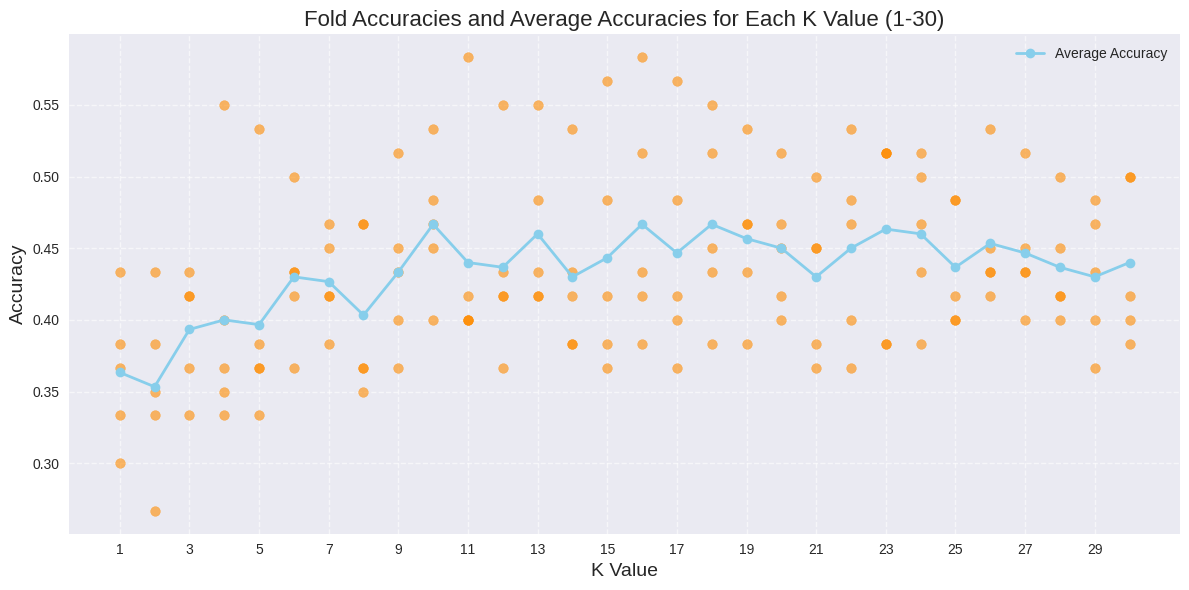

In [161]:

folds_per_k = 5
num_k_values = 30

plt.figure(figsize=(12, 6))

fold_accuracy_values = [record['accuracy'] for record in fold_accuracies]

for k in range(num_k_values):
    start = k * folds_per_k
    end = start + folds_per_k
    plt.scatter([k + 1] * folds_per_k, fold_accuracy_values[start:end], color='darkorange', alpha=0.6)

plt.plot(range(1, num_k_values + 1), mean_accuracies, color='skyblue', linewidth=2, marker='o', label='Average Accuracy')


plt.xlabel('K Value', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Fold Accuracies and Average Accuracies for Each K Value (1-30)', fontsize=16)
plt.xticks(range(1, num_k_values + 1, 2)) # Show every other k value on x-axis
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()